# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# LOADING AND CHECKING DATASET

In [2]:
df = pd.read_csv('Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# DATA VISUALIZATION

In [7]:
sns.set_palette("rainbow")
sns.set_style('dark')

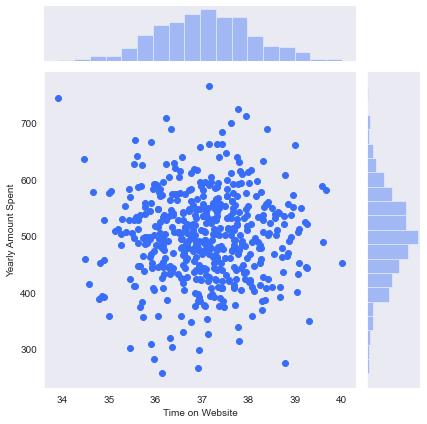

In [8]:
sns.jointplot(df['Time on Website'],df['Yearly Amount Spent'],data=df)

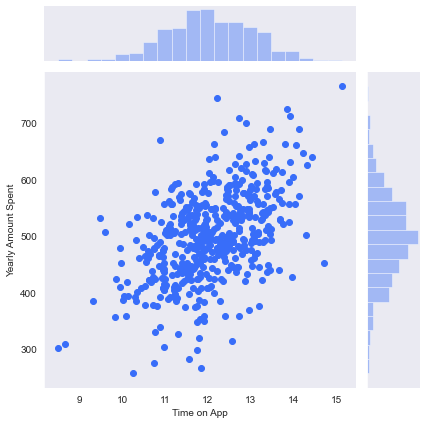

In [9]:
sns.jointplot(df['Time on App'],df['Yearly Amount Spent'],data=df)

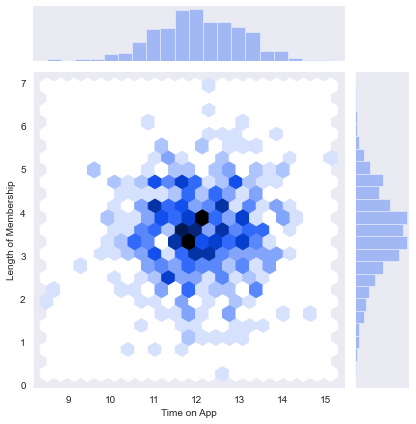

In [10]:
sns.jointplot(df['Time on App'],df['Length of Membership'],data=df,kind='hex')

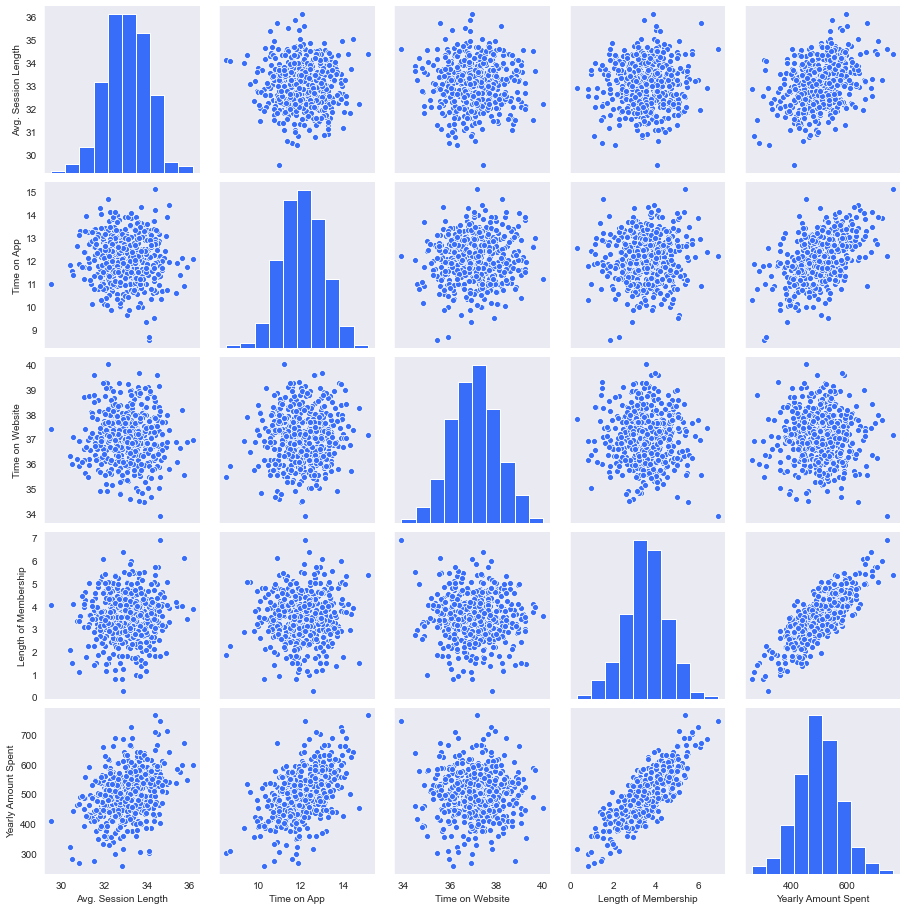

In [11]:
sns.pairplot(df)

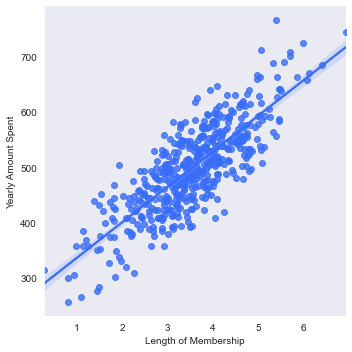

In [12]:
sns.lmplot(x = 'Length of Membership',y='Yearly Amount Spent',data=df)

# INPUT AND OUTPUT DATA FROM MODEL

In [13]:
X = pd.DataFrame(df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']])
y = pd.DataFrame(df['Yearly Amount Spent'])

# TRAIN TEST SPLIT

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# TRAINING THE MODEL 

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train,y_train)

LinearRegression()

# PREDICTING THE MODEL

In [19]:
predictions = lm.predict(X_test)

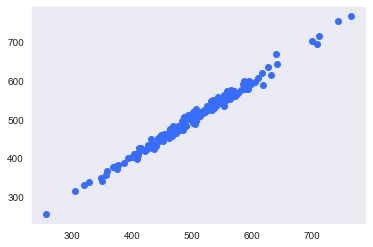

In [20]:
plt.scatter(y_test,predictions)

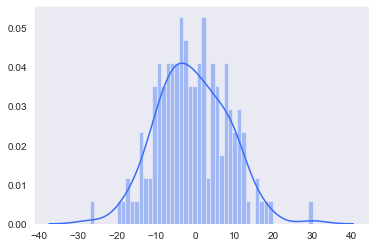

In [21]:
sns.distplot((y_test-predictions),bins=50)

# EVALUATION METRICS

In [22]:
from sklearn import metrics

## Mean Absolute Error (MAE) 

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 7.228148653430838


## Mean Squared Error (MSE)

In [24]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 79.81305165097461


## Root Mean Squared Error (RMSE)

In [25]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 8.933815066978642


# MODEL EVALUATION

In [26]:
print('Coefficients',lm.coef_)

Coefficients [[25.98154972 38.59015875  0.19040528 61.27909654]]


In [27]:
df_coeff = pd.DataFrame(lm.coef_[-1],X.columns,columns=['Coefficient'])
df_coeff

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### Do you think the company should focus more on their mobile app or on their website?

Based on the obtained result, we can conclude people spending more time on App. Putting more efforts on the app will further increase easy access for the customers. 
But customer's time spent on website is less when compare to app, in this case we can invest more effort for improving the website accessibility. Then we can compare both and come to the conclusion. 